In [9]:
from pycalphad import equilibrium, calculate
from pycalphad import Database
import pycalphad.variables as v

In [10]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID']#, 'HCP_A3']#, 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4', 'FCC_A1']

In [13]:
%lprun -f equilibrium eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (1e-6, 1, 0.01), v.T: [300, 1400]})
print(eq.X)

Components: AL FE VA
Phases: LIQUID [done]
Computing initial grid [14 points, 2.0KB]
Computing convex hull [iteration 1]
progress 175420.799693
Refining convex hull
Rebuilding grid [214 points, 29.2KB]
Computing convex hull [iteration 2]
progress 20082.1885385
Refining convex hull
Rebuilding grid [414 points, 56.4KB]
Computing convex hull [iteration 3]
progress 24577.718263
Refining convex hull
Rebuilding grid [614 points, 83.6KB]
Computing convex hull [iteration 4]
progress 42182.1602129
Refining convex hull
Rebuilding grid [814 points, 110.8KB]
Computing convex hull [iteration 5]
progress 4236.96439515
Refining convex hull
Rebuilding grid [1014 points, 138.0KB]
Computing convex hull [iteration 6]
progress 1961.83133137
Refining convex hull
Rebuilding grid [1214 points, 165.2KB]
Computing convex hull [iteration 7]
progress 855.588667146
Refining convex hull
Rebuilding grid [1414 points, 192.4KB]
Computing convex hull [iteration 8]
progress 5657.84314203
Refining convex hull
Rebuilding

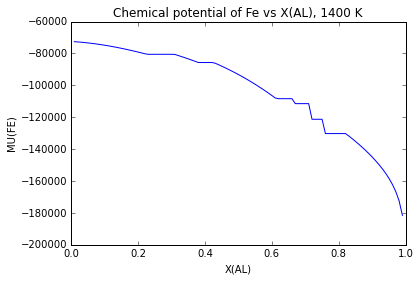

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1400 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
plt.plot(eq.X_AL, eq.MU.sel(T=1400, component='FE'))

In [13]:
%%time
eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe,
    {v.X('AL'): 0.2, v.T: (300, 1400, 100)})
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4 FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [76 points, 71.0KB]
Computing convex hull [iteration 1]
progress 79670.6919449
Refining convex hull
Rebuilding grid [86 points, 80.3KB]
Computing convex hull [iteration 2]
progress 167.762534627
Refining convex hull
Rebuilding grid [96 points, 89.6KB]
Computing convex hull [iteration 3]
progress 120.578394215
Refining convex hull
Rebuilding grid [106 points, 98.9KB]
Computing convex hull [iteration 4]
progress 39.9865874573
Refining convex hull
Rebuilding grid [116 points, 108.2KB]
Computing convex hull [iteration 5]
progress 12.9016774795
Refining convex hull
Rebuilding grid [126 points, 117.6KB]
Computing convex hull [iteration 6]
progress 2.15551599224
Refining convex hull
Rebuilding grid [136 points, 126.9KB]
Computing convex hull [iteration 7]
progress 0.980394592676
Refining convex hull
Rebuilding grid [146 points, 136.2KB]
Computing convex hull [iteration 8]
progress 0.074

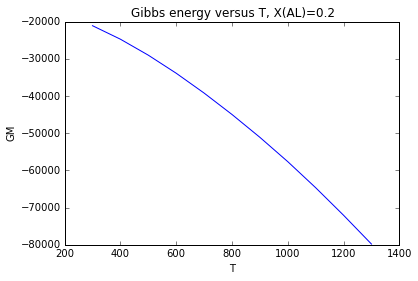

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gca().set_title('Gibbs energy versus T, X(AL)=0.2')
plt.gca().set_xlabel('T')
plt.gca().set_ylabel('GM')
plt.plot(eq['T'], eq.GM.sel(X_AL=0.2))